# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [564]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))
dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

genre_filter = "all"  # all by default. To focus on a specific genre change the value

s_senses = io.open(dir_expert+"/senses_69419.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15/69419/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/params_v8.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

i = 0
for line in parameter_file.readlines():
    i+=1
    if i == 4:
        line = line.split("\t")
        window_size = int(line[1])
        print("Window size:",window_size,type(window_size))
        
    if i == 13:
        line = line.split("\t")
        iterations = int(line[1])
        print("Iterations:",iterations,type(iterations))
        
    if i == 14:
        line = line.split("\t")
        start_time = int(line[1])
        print("Start time:",start_time,type(start_time))
        
    if i == 15:
        line = line.split("\t")
        end_time = int(line[1])
        print("End time:",end_time,type(end_time))
    
    if i == 16:
        line = line.split("\t")
        time_interval = int(line[1])
        print("Time interval:",time_interval,type(time_interval))

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 69419
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_69419.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15/69419/output.dat' mode='r' encoding='UTF-8'>
_v8.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419_v8.txt
Window size: 5 <class 'int'>
Iterations: 1000 <class 'int'>
Start time: -800 <class 'int'>
End time: 400 <class 'int'>
Time interval: 100 <class 'int'>


93

In [610]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time):
    if temp_start_time + time_interval < end_time:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + bugfix # cfr above

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time):
        
        if i > int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                    
        
        
    

print(slice_years)

1
2
3
4
5
6
7
8
9
10
11
100
-800 400
{0: [-799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -770, -769, -768, -767, -766, -765, -764, -763, -762, -761, -760, -759, -758, -757, -756, -755, -754, -753, -752, -751, -750, -749, -748, -747, -746, -745, -744, -743, -742, -741, -740, -739, -738, -737, -736, -735, -734, -733, -732, -731, -730, -729, -728, -727, -726, -725, -724, -723, -722, -721, -720, -719, -718, -717, -716, -715, -714, -713, -712, -711, -710, -709, -708, -707, -706, -705, -704, -703, -702, -701], 1: [-699, -698, -697, -696, -695, -694, -693, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -678, -677, -676, -675, -674, -673, -672, -671, -670, -669, -668, -667, -666, -665, -664, -663, -662, -661, -660, -659, -658, -657, -656, -655, -654, -653, -652, -651, -650, -649, -648, -647, -646, -645, -644, -643, -642, -641, -640,

## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

In [611]:
# For each target word, we have a list of senses  s (given by the expert)
# For each target word, we have a list of senses k (given by the model)
# This Q consists in matching s and k, and doing so in a confident way --> confidence score

for each k:
    for each s:
        create conf(k,s)

# What is conf(k,s)?
        conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))/10 WHERE
    
            px = probability of word wx 
                
                and
            
            match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 
            
                    or 
                            0 if w_is_not_associated_to_s
                
# Once we have gone through all s for one k, we have to choose the best k for s. How? (TBD, cfr Valerio and Barbara)

# Once all ks have been assigned to all ss (or NA), we can calculate a general confidence score for the model.
# One easy way to do that: 

conf_score_model = number_of_non_NA/k

SyntaxError: invalid syntax (<ipython-input-611-82fa54601c9a>, line 5)

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [612]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0




for line in file_senses: 
    cells = line.split("\t")
    sense = cells[11] # The sense ID is after the 10th tab
    if sense != 'w':
        
        
        if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
            #print(int(s[12]))
            expert_senses.append(sense)
              
        else:
            expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created

    else:
         expert_senses.append("NA")

#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
#for i in range(2,3):
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        cells = line.split("\t") # splitting on tabs
        if int(cells[12]) == 1:  # senses inferred from collocates
            if cells[11] == expert_senses[i]:      # we store all words for one sense 
                
        
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
        
        
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                list_of_ids_window = list()
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account

                        list_of_ids_window.append(list_of_ids[n])
                
                    except IndexError: # if there isn't, too bad
                        sentences_smaller_than_window_size += 1

                for word_id in list_of_ids_window:
                    if int(cells[12]) == 1:
                        
                        
                        if cells[11] == expert_senses[i]:  

                            dict_of_words[expert_senses[i]].append(word_id)                    
                            
                    
                    
                    list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores
            
            
            # if the sense is "w", the collocates are put in the "NA words"
            
            if cells[11] == "w":
                #print("W")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                list_of_ids_window = list()
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account

                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                        dummy_counter +=1
                    
        else:  # words that are in "non collocates senses"
            #print("NON COLOC")
            sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
            #print(sentence_of_ids)
            list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
            index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
            #print(index_of_target)
            list_of_ids_window = list()
            #print(index_of_target-window_size,index_of_target+window_size+1)
            for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                try:   # if there's a word it's taken into account
                    #print(list_of_ids_window)
                    #print(list_of_ids[n])
                    list_of_NA_words.append(list_of_ids[n])
                    list_of_all_words.append(list_of_ids[n])
                except IndexError:
                        dummy_counter +=1
            #print(list_of_NA_words)
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can pyt that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['NA', 'mus-2', 'mus-1', 'mus-4']
ITERTOOLS ['mus-1', 'NA', 'mus-4', 'mus-2']
Number of senses: 4 ['mus-1', 'NA', 'mus-4', 'mus-2']
mus-1
i 0 sense mus-1 number of words 263
words {'nlsj32167', '33770', '51815', '26207', '75552', '70477', '23690', '18937', '27415', '29624', '31161', '1564', '31709', '7529', '115193', '73435', '103942', '114816', '36165', '43206', '17962', '64586', 'nlsj8970', '70105', '76335', '96768', 'nlsj5904', '18271', '19641', 'nlsj69856', '114706', '59124', '110456', '83774', '51849', '107959', '56406', '40156', '105816', '67974', '104538', '2834', '95221', '108780', '42659', '49506', '8909', '37776', '114587', '110484', '100965', '21431', '75477', '52571', '16400', '38547', '84422', '98173', '98234', 'nlsj114757', '47447', '51256', '41538', 'nlsj4012', '29962', '4845', 'nlsj4784', '51376', '41633', '71308', '104421', '80555', '41536', '7561', '63713', '114688', '23678', '41705', '34372', '93786', '63845', '58478', '12641', '2583', '29883', '48291', '79947', 

57

In [724]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    sense = cells[11] # The sense ID is after the 10th tab
    if sense != 'w':
        #print(sense)
        
        
        if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
            #print(int(s[12]))
            #expert_senses.append(sense)
            
            for period in slice_years.keys():
                if int(cells[0]) in slice_years[period]:
                    #sense_for_period_counter += 1
                    sense_date_amount[sense,period] += 1
                    counter += 1
                    
        else:
            for period in slice_years.keys():
                if int(cells[0]) in slice_years[period]:
                    #sense_for_period_counter += 1
                    sense_date_amount["NA",period] += 1
                    counter += 1
            
            
   
    if sense == "w":  # counting the NAs
            for period in slice_years.keys():
                if int(cells[0]) in slice_years[period]:
                    #sense_for_period_counter += 1
                    sense_date_amount["NA",period] += 1
                    counter += 1
                    

print(sense_date_amount)
print(counter)

{('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 0, ('mus-1', 4): 0, ('mus-1', 5): 0, ('mus-1', 6): 0, ('mus-1', 7): 0, ('mus-1', 8): 0, ('mus-1', 9): 0, ('mus-1', 10): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('NA', 8): 0, ('NA', 9): 0, ('NA', 10): 0, ('mus-4', 0): 0, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 0, ('mus-4', 4): 0, ('mus-4', 5): 0, ('mus-4', 6): 0, ('mus-4', 7): 0, ('mus-4', 8): 0, ('mus-4', 9): 0, ('mus-4', 10): 0, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 0, ('mus-2', 7): 0, ('mus-2', 8): 0, ('mus-2', 9): 0, ('mus-2', 10): 0} 

{('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 2, ('mus-1', 4): 1, ('mus-1', 5): 4, ('mus-1', 6): 1, ('mus-1', 7): 4, ('mus-1', 8): 14, ('mus-1', 9): 3, ('mus-1', 10): 9, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 11, ('NA', 4): 5, ('NA', 5): 2, ('N

In [725]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])
for word in list_of_all_words:
    try: 
        print(word,word_weight[word])
    except KeyError:
        print(word,"isnt in non-NA senses")
    try:
        print(word,word_weight_NA[word])
    except KeyError:
        print(word,"isnt in NA sense")

['mus-1', 'NA', 'mus-4', 'mus-2']
36165 1.0
36165 0.5
18334 1.0
18334 0.5
34855 1.0
34855 isnt in NA sense
41633 1.0
41633 isnt in NA sense
71314 1.0
71314 0.5
69419 0.3333333333333333
69419 0.25
15380 1.0
15380 isnt in NA sense
42890 1.0
42890 0.5
110302 1.0
110302 isnt in NA sense
104311 1.0
104311 0.5
16400 1.0
16400 0.5
50093 0
50093 1.0
47665 0
47665 1.0
63143 0
63143 1.0
45996 0.5
45996 0.3333333333333333
113560 1.0
113560 0.5
69419 0.3333333333333333
69419 0.25
62204 1.0
62204 0.5
22739 0
22739 1.0
57262 1.0
57262 0.5
29828 0
29828 1.0
23468 0
23468 1.0
110598 0
110598 1.0
75263 0
75263 1.0
69419 0.3333333333333333
69419 0.25
19641 1.0
19641 0.5
nlsj78558 0
nlsj78558 1.0
80761 1.0
80761 0.5
95258 0
95258 1.0
26447 0
26447 1.0
22100 1.0
22100 0.5
106502 0
106502 1.0
30911 0
30911 1.0
69419 0.3333333333333333
69419 0.25
22100 1.0
22100 0.5
22209 0.5
22209 0.3333333333333333
53442 1.0
53442 0.5
8909 1.0
8909 0.5
nlsj52509 0
nlsj52509 1.0
75263 0
75263 1.0
22209 0.5
22209 0.33333333

67974 1.0
67974 isnt in NA sense
48291 1.0
48291 0.5
29624 1.0
29624 isnt in NA sense
nlsj114757 0.5
nlsj114757 0.3333333333333333
113823 1.0
113823 isnt in NA sense
45980 0.5
45980 isnt in NA sense
260 1.0
260 0.5
110456 1.0
110456 isnt in NA sense
36390 1.0
36390 isnt in NA sense
69419 0.3333333333333333
69419 0.25
112720 0.5
112720 isnt in NA sense
31161 1.0
31161 0.5
59124 1.0
59124 isnt in NA sense
45513 1.0
45513 isnt in NA sense
37711 1.0
37711 isnt in NA sense
69419 0.3333333333333333
69419 0.25
41082 1.0
41082 isnt in NA sense
5132 1.0
5132 isnt in NA sense
103922 1.0
103922 0.5
111207 1.0
111207 isnt in NA sense
112720 0.5
112720 isnt in NA sense
106566 0
106566 1.0
72275 0
72275 1.0
51727 0
51727 1.0
12349 0
12349 1.0
75316 0
75316 1.0
69419 0.3333333333333333
69419 0.25
70105 1.0
70105 0.5
32657 0
32657 1.0
nlsj11198 1.0
nlsj11198 0.5
7182 0
7182 1.0
6174 1.0
6174 0.5
71976 0
71976 1.0
28569 0
28569 1.0
73064 0
73064 1.0
26447 0
26447 1.0
23799 0
23799 1.0
69419 0.333333333

36571 1.0
34071 0
34071 1.0
26048 0
26048 1.0
43206 0.5
43206 isnt in NA sense
nlsj69856 1.0
nlsj69856 isnt in NA sense
56406 1.0
56406 isnt in NA sense
25007 1.0
25007 isnt in NA sense
92406 1.0
92406 isnt in NA sense
69419 0.3333333333333333
69419 0.25
15380 1.0
15380 isnt in NA sense
41538 1.0
41538 isnt in NA sense
96979 1.0
96979 isnt in NA sense
48291 1.0
48291 0.5
114706 1.0
114706 0.5
nlsj4784 1.0
nlsj4784 0.5
78746 1.0
78746 isnt in NA sense
104690 0.5
104690 0.3333333333333333
42686 1.0
42686 isnt in NA sense
104538 1.0
104538 isnt in NA sense
69419 0.3333333333333333
69419 0.25
nlsj60710 1.0
nlsj60710 isnt in NA sense
110639 0.5
110639 0.3333333333333333
nlsj4784 1.0
nlsj4784 0.5
78746 1.0
78746 isnt in NA sense
104690 0.5
104690 0.3333333333333333
23658 0
23658 1.0
77698 0
77698 1.0
nlsj68228 0
nlsj68228 1.0
47617 0
47617 1.0
114706 1.0
114706 0.5
69419 0.3333333333333333
69419 0.25
62816 0
62816 1.0
69052 0
69052 1.0
nlsj40132 0
nlsj40132 1.0
15162 0
15162 1.0
23658 0
2365

3241 1.0
92171 0
92171 1.0
42827 0
42827 1.0
13039 1.0
13039 0.5
70768 1.0
70768 0.5
69419 0.3333333333333333
69419 0.25
66294 0
66294 1.0
3800 0
3800 1.0
88716 0
88716 1.0
48867 0
48867 1.0
5112 0
5112 1.0
69419 0.3333333333333333
69419 0.25
85672 1.0
85672 0.5
260 1.0
260 0.5
69419 0.3333333333333333
69419 0.25
85672 1.0
85672 0.5
260 1.0
260 0.5
2224 1.0
2224 0.5
110027 0
110027 1.0
92162 0
92162 1.0
110027 0
110027 1.0
62528 0
62528 1.0
69419 0.3333333333333333
69419 0.25
79103 0
79103 1.0
103942 1.0
103942 0.5
76431 0
76431 1.0
90329 0
90329 1.0
29883 0.5
29883 0.3333333333333333
51241 0
51241 1.0
4548 0
4548 1.0
69419 0.3333333333333333
69419 0.25
15893 1.0
15893 0.5
76431 0
76431 1.0
90329 0
90329 1.0
29883 0.5
29883 0.3333333333333333
51241 0
51241 1.0
48291 1.0
48291 0.5
36165 1.0
36165 0.5
nlsj96033 0
nlsj96033 1.0
67485 0
67485 1.0
75352 0
75352 1.0
69419 0.3333333333333333
69419 0.25
75306 0
75306 1.0
7832 0
7832 1.0
102381 0
102381 1.0
83434 0
83434 1.0
112559 0
112559 1.0

403 1.0
7944 0
7944 1.0
45996 0.5
45996 0.3333333333333333
69419 0.3333333333333333
69419 0.25
103922 1.0
103922 0.5
82758 1.0
82758 0.5
80239 1.0
80239 0.5
49589 0
49589 1.0
61855 0
61855 1.0
104311 1.0
104311 0.5
19546 0
19546 1.0
nlsj100912 0
nlsj100912 1.0
11206 0
11206 1.0
82959 0
82959 1.0
69419 0.3333333333333333
69419 0.25
83774 1.0
83774 0.5
110639 0.5
110639 0.3333333333333333
31236 1.0
31236 0.5
71314 1.0
71314 0.5
104311 1.0
104311 0.5
62204 1.0
62204 0.5
69036 0
69036 1.0
116058 0
116058 1.0
75306 0
75306 1.0
31562 1.0
31562 0.5
69419 0.3333333333333333
69419 0.25
14050 0
14050 1.0
22209 0.5
22209 0.3333333333333333
7612 0
7612 1.0
46123 0
46123 1.0
66639 0
66639 1.0
116416 0.5
116416 0.3333333333333333
69419 0.3333333333333333
69419 0.25
66777 0
66777 1.0
114847 0
114847 1.0
42890 1.0
42890 0.5
114842 0
114842 1.0
66746 0
66746 1.0
106566 0
106566 1.0
72275 0
72275 1.0
51727 0
51727 1.0
12349 0
12349 1.0
75316 0
75316 1.0
69419 0.3333333333333333
69419 0.25
70105 1.0
7010

72287 0.5
23690 1.0
23690 0.5
16171 1.0
16171 0.5
nlsj114757 0.5
nlsj114757 0.3333333333333333
111895 1.0
111895 0.5
66173 0
66173 1.0
72287 1.0
72287 0.5
55498 0
55498 1.0
2671 0
2671 1.0
45996 0.5
45996 0.3333333333333333
69419 0.3333333333333333
69419 0.25
21487 1.0
21487 0.5
110655 0
110655 1.0
55532 0
55532 1.0
37488 0
37488 1.0
55997 1.0
55997 0.5
69419 0.3333333333333333
69419 0.25
nlsj40053 1.0
nlsj40053 0.5
4927 0
4927 1.0
55997 1.0
55997 0.5
69419 0.3333333333333333
69419 0.25
nlsj40053 1.0
nlsj40053 0.5
105176 0
105176 1.0
13098 0
13098 1.0
51241 0
51241 1.0
69419 0.3333333333333333
69419 0.25
104690 0.5
104690 0.3333333333333333
69419 0.3333333333333333
69419 0.25
nlsj106628 0
nlsj106628 1.0
24444 0
24444 1.0
105550 0
105550 1.0
61791 0
61791 1.0
21335 0
21335 1.0
49589 0
49589 1.0
13098 0
13098 1.0
95522 0
95522 1.0
80327 0
80327 1.0
11305 0
11305 1.0
69419 0.3333333333333333
69419 0.25
38966 0
38966 1.0
91800 0
91800 1.0
70958 1.0
70958 0.5
nlsj12527 0
nlsj12527 1.0
18334

76910 1.0
76910 isnt in NA sense
49875 1.0
49875 0.5
54990 1.0
54990 isnt in NA sense
58271 1.0
58271 isnt in NA sense
60317 1.0
60317 isnt in NA sense
69419 0.3333333333333333
69419 0.25
nlsj86871 1.0
nlsj86871 isnt in NA sense
101982 1.0
101982 isnt in NA sense
66342 0.5
66342 isnt in NA sense
75653 1.0
75653 isnt in NA sense
nlsj70384 1.0
nlsj70384 isnt in NA sense
16440 1.0
16440 isnt in NA sense
75652 1.0
75652 isnt in NA sense
113881 1.0
113881 isnt in NA sense
nlsj70384 1.0
nlsj70384 isnt in NA sense
101982 1.0
101982 isnt in NA sense
69419 0.3333333333333333
69419 0.25
nlsj86871 1.0
nlsj86871 isnt in NA sense
60317 1.0
60317 isnt in NA sense
68144 1.0
68144 isnt in NA sense
58271 1.0
58271 isnt in NA sense
69419 0.3333333333333333
69419 0.25
75652 1.0
75652 isnt in NA sense
58271 1.0
58271 isnt in NA sense
69419 0.3333333333333333
69419 0.25
75652 1.0
75652 isnt in NA sense
45525 1.0
45525 isnt in NA sense
60316 1.0
60316 isnt in NA sense
19789 1.0
19789 isnt in NA sense
113881

#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [726]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

['  69419 (0.059) ', ' 57460 (0.054) ', ' 14362 (0.046) ', ' 29624 (0.039) ', ' 75595 (0.033) ', ' 83209 (0.033) ', ' 55497 (0.031) ', ' 17381 (0.026) ', ' 64448 (0.026) ', ' 83834 (0.025) ']
  69419 (0.059) 
word id 69419 ; probability 0.059
 57460 (0.054) 
word id 57460 ; probability 0.054
 14362 (0.046) 
word id 14362 ; probability 0.046
 29624 (0.039) 
word id 29624 ; probability 0.039
 75595 (0.033) 
word id 75595 ; probability 0.033
 83209 (0.033) 
word id 83209 ; probability 0.033
 55497 (0.031) 
word id 55497 ; probability 0.031
 17381 (0.026) 
word id 17381 ; probability 0.026
 64448 (0.026) 
word id 64448 ; probability 0.026
 83834 (0.025) 
word id 83834 ; probability 0.025
{'69419': 0.15860215053763435}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806, '14362': 0.12365591397849458}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806, '14362': 0.12365591397849458, '29624': 0.10483870967741932}
{'6941

19

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [727]:
for word in set(list_of_all_words):
    if word == "105344":
        print("found all")
        
for word in set(list_of_NA_words):
    if word == "105344":
        print("found NA")

found all
found NA


In [728]:
#print("Probability for word ID 5390 in sense k = 4:",k_words_with_prob[4]["5390"])
print(type(k_words_with_prob[4]))

#print(k_words_with_prob[4]["15047"])

print(word_weight["105344"])
#print(word_weight_NA["105344"])


<class 'dict'>
0


In [729]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 mus-1
		word from annotation for sense 0 : 69419
				normal
			word  69419 is in output for sense 0 with probability: 0.15860215053763435 and weight: 0.3333333333333333
		word from annotation for sense 0 : 57460
		word from annotation for sense 0 : 14362
				normal
			word  14362 is in output for sense 0 with probability: 0.12365591397849458 and weight: 1.0
		word from annotation for sense 0 : 29624
				normal
			word  29624 is in output for sense 0 with probability: 0.10483870967741932 and weight: 1.0
		word from annotation for sense 0 : 75595
		word from annotation for sense 0 : 83209
		word from annotation for sense 0 : 55497
		word from annotation for sense 0 : 17381
				normal
			word  17381 is in output for sense 0 with probability: 0.06989247311827955 and weight: 1.0
		word from annotation for sense 0 : 64448
				normal
			word  64448 is in output for sense 0 with probability: 0.06989247311827955 and weight: 1.0
		word from annotation for s

		word from annotation for sense 10 : 20413
				normal
			word  20413 is in output for sense 10 with probability: 0.08064516129032256 and weight: 1.0
		word from annotation for sense 10 : 76157
		word from annotation for sense 10 : 83665
		word from annotation for sense 10 : 70495
		word from annotation for sense 10 : 100964
output sense 11
	expert sense number  0 mus-1
		word from annotation for sense 11 : 22467
		word from annotation for sense 11 : 4562
		word from annotation for sense 11 : 47745
		word from annotation for sense 11 : 2224
				normal
			word  2224 is in output for sense 11 with probability: 0.1008827238335435 and weight: 1.0
		word from annotation for sense 11 : 51647
				normal
			word  51647 is in output for sense 11 with probability: 0.08701134930643127 and weight: 1.0
		word from annotation for sense 11 : 62204
				normal
			word  62204 is in output for sense 11 with probability: 0.035308953341740223 and weight: 1.0
		word from annotation for sense 11 : 75352
		wo

In [730]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 4
number of model output senses k: 15


Choose best match for k = 0
k,mot 0 69419
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.15860215053763435
word_weight[mot] 0.3333333333333333
sense mus-1 mot 69419 match_weighted 0.05286738351254478
k,mot 0 57460
expert_senses[s] mus-1
k,mot 0 14362
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.12365591397849458
word_weight[mot] 1.0
sense mus-1 mot 14362 match_weighted 0.12365591397849458
k,mot 0 29624
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.10483870967741932
word_weight[mot] 1.0
sense mus-1 mot 29624 match_weighted 0.10483870967741932
k,mot 0 75595
expert_senses[s] mus-1
k,mot 0 83209
expert_senses[s] mus-1
k,mot 0 55497
expert_senses[s] mus-1
k,mot 0 17381
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.06989247311827955
word_weight[mot] 1.0
sense mus-1 mot 17381 match_weighted 0.06989247311827955
k,mot 0 64448
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.06989247311827955
word_weight[mot

expert_senses[s] mus-2
k,mot 7 13098
expert_senses[s] mus-2
k,mot 7 65552
expert_senses[s] mus-2
k_words_with_prob[k][mot] 0.07661822985468955
word_weight[mot] 0.5
sense mus-2 mot 65552 match_weighted 0.038309114927344776
k,mot 7 31236
expert_senses[s] mus-2
k,mot 7 66494
expert_senses[s] mus-2
k,mot 7 80327
expert_senses[s] mus-2
k,mot 7 nlsj12527
expert_senses[s] mus-2


Choose best match for k = 8
k,mot 8 15121
expert_senses[s] mus-1
k,mot 8 70105
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.1283783783783784
word_weight[mot] 1.0
sense mus-1 mot 70105 match_weighted 0.1283783783783784
k,mot 8 nlsj11198
expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.11936936936936939
word_weight[mot] 1.0
sense mus-1 mot nlsj11198 match_weighted 0.11936936936936939
k,mot 8 106676
expert_senses[s] mus-1
k,mot 8 15609
expert_senses[s] mus-1
k,mot 8 71404
expert_senses[s] mus-1
k,mot 8 75595
expert_senses[s] mus-1
k,mot 8 70495
expert_senses[s] mus-1
k,mot 8 32657
expert_senses[s] mus-1
k,mot 8 

In [731]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
# TODO: get the NA to be correct as well
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.42114695340501784, (0, 1): 0.07459677419354836, (0, 2): 0.43727598566308234, (0, 3): 0.1415770609318996, (1, 0): 0.2730696798493409, (1, 1): 0.3349026993094789, (1, 2): 0.5235404896421845, (1, 3): 0.047080979284369114, (2, 0): 0.24469820554649263, (2, 1): 0.24632952691680257, (2, 2): 0.495921696574225, (2, 3): 0.10929853181076671, (3, 0): 0.8072072072072072, (3, 1): 0.16171171171171167, (3, 2): 0.06846846846846846, (3, 3): 0.12432432432432433, (4, 0): 0.38652482269503535, (4, 1): 0.5210401891252954, (4, 2): 0.3170212765957446, (4, 3): 0, (5, 0): 0.41107382550335564, (5, 1): 0.08137583892617449, (5, 2): 0.036912751677852344, (5, 3): 0.5520134228187918, (6, 0): 0.17687074829931967, (6, 1): 0.5730229591836733, (6, 2): 0.2738095238095237, (6, 3): 0.12202380952380949, (7, 0): 0.25165125495376484, (7, 1): 0.7888595332452663, (7, 2): 0.0640686922060766, (7, 3): 0.038309114927344776, (8, 0): 0.24774774774774777, (8, 1): 0.4695945945945947, (8, 2): 0.445945945945946, (8, 3): 0, (9, 0

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [732]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
        
        
    

{0: 'NA', 1: 'NA', 2: 2, 3: 0, 4: 'NA', 5: 3, 6: 1, 7: 1, 8: 'NA', 9: 'NA', 10: 'NA', 11: 'NA', 12: 1, 13: 1, 14: 'NA'}
for each s, the k (or more) assigned to it: {'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}


## Q3: How well does the model assign the right words to a given sense of the target word?

In [733]:
# For each k, we use the words given by the expert as unquestionable truth.
# Judging the model's assignment of words to a given sense becomes a question of precision and recall.

# precision is all correct w weighted by their respective probabilities / all w weighted by their probabilities

for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
        w_weight = p*1
        denominator += w_weight
    precision = numerator/denominator
    
# recall is all correct w weighted by their respective probabilities / all w assigned to the sense by the expert
for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
    denominator = len(expert_list)
    recall = numerator/denominator
    
# f-score can be used as well

for each k:
    f_score = 2 * precision * recall / (precision+recall)

SyntaxError: invalid syntax (<ipython-input-733-f315d04cacf9>, line 6)

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [734]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

			THIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below



K 0 s is NA
K 1 s is NA
For pair ks 2 2 :
252
The RECALL is 0.495921696574225 / 236.66666666666669 = 0.5280518346621326
The PRECISION is 0.495921696574225 * number of expert words in that sense/ 0.9999999999999998 = 0.49592169657422513 

The F-SCORE is 0.5114826775035664 

For pair ks 3 0 :
263
The RECALL is 0.899099099099099 / 249.16666666666669 = 0.9490156377112898
The PRECISION is 0.899099099099099 * number of expert words in that sense/ 0.9999999999999999 = 0.8990990990990991 

The F-SCORE is 0.9233832596019383 

K 4 s is NA
For pair ks 5 3 :
113
The RECALL is 0.5520134228187918 / 106.16666666666666 = 0.5875433291540674
The PRECISION is 0.5520134228187918 * number of expert words in that sense/ 0.9999999999999999 = 0.552013422818792 

The F-SCORE is 0.5692244877127619 

For pair ks 6 1 :
498
The RECALL is 0.9017857142857141 / 102.16666666666666 = 4.395653693777674
The PRECISION is 0.9017857142857141 * number of expe

## P and R based on S, with adapted word weight for NA

In [735]:
print(s_k_match)
print(expert_senses)

{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
['mus-1', 'NA', 'mus-4', 'mus-2']


In [736]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
s and k: NA [0, 1, 4, 8, 9, 10, 11, 14]
s_k_match[key][any_k] 0
69419 NA
57460 NA
14362 NA
29624 NA
75595 NA
83209 NA
55497 NA
17381 NA
64448 NA
83834 NA
s_k_match[key][any_k] 1
83665 NA
70495 NA
48504 NA
45996 NA
79223 NA
26447 NA
28569 NA
114587 NA
nlsj71743 NA
26034 NA
s_k_match[key][any_k] 4
42830 NA
5132 NA
83434 NA
35570 NA
85665 NA
53442 NA
76910 NA
103085 NA
101982 NA
67009 NA
s_k_match[key][any_k] 8
59708 NA
17381 NA
50679 NA
63352 NA
14362 NA
43206 NA
69419 NA
54990 NA
58271 NA
23283 NA
s_k_match[key][any_k] 9
22209 NA
24436 NA
52035 NA
31562 NA
63550 NA
70495 NA
33770 NA
21901 NA
12409 NA
nlsj71743 NA
s_k_match[key][any_k] 10
15380 NA
21920 NA
nlsj70384 NA
51647 NA
62258 NA
68539 NA
112070 NA
nlsj86871 NA
39847 NA
18062 NA
s_k_match[key][any_k] 11
52571 NA
67485 NA
69469 NA
41271 NA
nlsj11198 NA
11058 NA
15121 NA
3327 NA
19282 NA
34848 NA
s_k_match[key][any_k] 14
31964 NA
22209 NA
91800 NA
115193 

In [737]:
type(expert_senses)
print(str(expert_senses))

['mus-1', 'NA', 'mus-4', 'mus-2']


In [738]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [], 1: [], 2: [0.5280518346621326, 0.49592169657422513, 0.5114826775035664], 3: [0.9490156377112898, 0.8990990990990991, 0.9233832596019383], 4: [], 5: [0.5875433291540674, 0.552013422818792, 0.5692244877127619], 6: [4.395653693777674, 0.9017857142857143, 1.4965485777760146], 7: [4.874388254486132, 1.0, 1.6595390169397388], 8: [], 9: [], 10: [], 11: [], 12: [2.524862980741019, 0.5179856115107915, 0.8596173325155483], 13: [3.7515265127736166, 0.7696404793608521, 1.2772484045155381], 14: []}
nothing for k 0
nothing for k 0
nothing for k 0
nothing for k 1
nothing for k 1
nothing for k 1
nothing for k 4
nothing for k 4
nothing for k 4
nothing for k 8
nothing for k 8
nothing for k 8
nothing for k 9
nothing for k 9
nothing for k 9
nothing for k 10
nothing for k 10
nothing for k 10
nothing for k 11
nothing for k 11
nothing for k 11
nothing for k 14
nothing for k 14
nothing for k 14
AVERAGED SCORES BASED ON Ks:
averaged recall =  1.1740694828870621
averaged precision =  0.342429734909965
a

80

In [739]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [740]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [741]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -770, -769, -768, -767, -766, -765, -764, -763, -762, -761, -760, -759, -758, -757, -756, -755, -754, -753, -752, -751, -750, -749, -748, -747, -746, -745, -744, -743, -742, -741, -740, -739, -738, -737, -736, -735, -734, -733, -732, -731, -730, -729, -728, -727, -726, -725, -724, -723, -722, -721, -720, -719, -718, -717, -716, -715, -714, -713, -712, -711, -710, -709, -708, -707, -706, -705, -704, -703, -702, -701] 

1 [-699, -698, -697, -696, -695, -694, -693, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -678, -677, -676, -675, -674, -673, -672, -671, -670, -669, -668, -667, -666, -665, -664, -663, -662, -661, -660, -659, -658, -657, -656, -655, -654, -653, -652, -651, -650, -649, -648, -647, -646, -645, -644, -643, -642, -641, -640, -639, -638, -637, -636, -635, -634, -6

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [742]:
total_period = dict()
print(number_of_slices)

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

11
total period {0: 0, 1: 0, 2: 0, 3: 31, 4: 9, 5: 6, 6: 4, 7: 13, 8: 26, 9: 19, 10: 69}
sense date amount {('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 2, ('mus-1', 4): 1, ('mus-1', 5): 4, ('mus-1', 6): 1, ('mus-1', 7): 4, ('mus-1', 8): 14, ('mus-1', 9): 3, ('mus-1', 10): 9, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 11, ('NA', 4): 5, ('NA', 5): 2, ('NA', 6): 3, ('NA', 7): 8, ('NA', 8): 11, ('NA', 9): 9, ('NA', 10): 38, ('mus-4', 0): 0, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 18, ('mus-4', 4): 3, ('mus-4', 5): 0, ('mus-4', 6): 0, ('mus-4', 7): 1, ('mus-4', 8): 1, ('mus-4', 9): 6, ('mus-4', 10): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 0, ('mus-2', 7): 0, ('mus-2', 8): 0, ('mus-2', 9): 1, ('mus-2', 10): 21}
('mus-1', 0) total for this sense at this period 0 total period 0
relative 0
('mus-1', 1) total for this sense at this period 0 total period 0
relative 0
('mus-1', 2) 

## Plotting expert annotation

In [743]:
print(valeurs)
print(s_k_match)
print(i_colours)

{0: [0, 0, 0, 0], 1: [0, 0, 0, 0], 2: [0, 0, 0, 0], 3: [0.1, 0.0, 0.9, 0.0], 4: [0.25, 0.0, 0.75, 0.0], 5: [1.0, 0.0, 0.0, 0.0], 6: [1.0, 0.0, 0.0, 0.0], 7: [0.8, 0.0, 0.2, 0.0], 8: [0.9333333333333333, 0.0, 0.06666666666666667, 0.0], 9: [0.3, 0.0, 0.6, 0.1], 10: [0.2903225806451613, 0.0, 0.03225806451612903, 0.6774193548387096]}
{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
{('0', 0): 'b', ('0', 1): 'g', ('0', 2): 'r', ('0', 3): 'c', ('1', 0): 'b', ('1', 1): 'g', ('1', 2): 'r', ('1', 3): 'c', ('2', 0): 'b', ('2', 1): 'g', ('2', 2): 'r', ('2', 3): 'c', ('3', 0): 'b', ('3', 1): 'g', ('3', 2): 'r', ('3', 3): 'c', ('4', 0): 'b', ('4', 1): 'g', ('4', 2): 'r', ('4', 3): 'c', ('5', 0): 'b', ('5', 1): 'g', ('5', 2): 'r', ('5', 3): 'c', ('6', 0): 'b', ('6', 1): 'g', ('6', 2): 'r', ('6', 3): 'c', ('7', 0): 'b', ('7', 1): 'g', ('7', 2): 'r', ('7', 3): 'c', ('8', 0): 'b', ('8', 1): 'g', ('8', 2): 'r', ('8', 3): 'c', ('9', 0): 'b', ('9', 1): 'g', ('9', 2): 'r', ('9

Period 0 [0, 0, 0, 0]
Period 1 [0, 0, 0, 0]
Period 2 [0, 0, 0, 0]
Period 3 [6, 35, 58, 0]
Period 4 [11, 55, 33, 0]
Period 5 [66, 33, 0, 0]
Period 6 [25, 75, 0, 0]
Period 7 [30, 61, 7, 0]
Period 8 [53, 42, 3, 0]
Period 9 [15, 47, 31, 5]
Period 10 [13, 55, 1, 30]


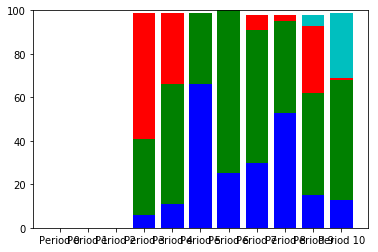

In [745]:
import numpy as np
import matplotlib.pyplot as plt

valeurs = period_relative
colours = ['b','g','r','c','m','y','k'] #to make sure colours remain the same throughout all slices
i_colours = dict()  # this dictionary stores the colour of a S

valeurs2 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(int(item*100))   # let's have percentages and not .xx
    valeurs2[key2] = list_temp

    #for value in valeurs
    

for key,vals in valeurs2.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            i_colours[key[-1:],i] = colours[i]
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            i_colours[key[-1:],i] = colours[i]
            
plt.xticks(range(len(valeurs2)), valeurs2.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()



In [746]:
print(valeurs2.keys())

dict_keys(['Period 0', 'Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5', 'Period 6', 'Period 7', 'Period 8', 'Period 9', 'Period 10'])


In [747]:
print(k_s_match)

for key,vals in valeurs2.items():
    print(key,vals)
    print(type(key),type(vals))
    for i in range(0,len(vals)):
        print("expert sense",i,"=",vals[i],"has the colour",colours[i])


{0: 'NA', 1: 'NA', 2: 2, 3: 0, 4: 'NA', 5: 3, 6: 1, 7: 1, 8: 'NA', 9: 'NA', 10: 'NA', 11: 'NA', 12: 1, 13: 1, 14: 'NA'}
Period 0 [0, 0, 0, 0]
<class 'str'> <class 'list'>
expert sense 0 = 0 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 0 has the colour r
expert sense 3 = 0 has the colour c
Period 1 [0, 0, 0, 0]
<class 'str'> <class 'list'>
expert sense 0 = 0 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 0 has the colour r
expert sense 3 = 0 has the colour c
Period 2 [0, 0, 0, 0]
<class 'str'> <class 'list'>
expert sense 0 = 0 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 0 has the colour r
expert sense 3 = 0 has the colour c
Period 3 [6, 35, 58, 0]
<class 'str'> <class 'list'>
expert sense 0 = 6 has the colour b
expert sense 1 = 35 has the colour g
expert sense 2 = 58 has the colour r
expert sense 3 = 0 has the colour c
Period 4 [11, 55, 33, 0]
<class 'str'> <class 'list'>
expert sense 0 = 11 has the colour b
exper

liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

In [748]:
print(period_relative_model)

{'0': [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06], '1': [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.174958886960884e-06, 3.0618581542379034e-09], '2': [3.753318488630808e-05, 2.4228506045686707e-09, 7.176899654721333e-16, 7.513111722667335e-14, 1.6527477250048993e-20, 1.7766669289231163e-09, 1.0201004963580681e-12, 6.866838106145038e-07, 2.8125738552697838e-11, 5.825910242802976e-10, 0.999961221823028, 4.794953402200785e-48, 7.483003493339234e

In [749]:
string = "Time=8  "
string = string.replace("Time=","")
string = string.replace("  ","")
print(string)

8


## Reading model output (period_relative_model)


In [750]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

Period 0 [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06]
<class 'str'> <class 'list'>

0 b




1 g
1 g
1 g
1 g

2 r

3 c











Period 1 [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.174958886960884e-06, 3.0618581542379034e-09]
<class 'str'> <class 'list'>

0 b




1 g
1 g
1 g
1 g

2 r

3 c











Period 2 [3.753318488630808e-05, 2.4228506045686707e-09, 7.176899654721333e-16, 7.513111722667335e-14, 1.6527477250048993e-20, 1.7766669289231163e

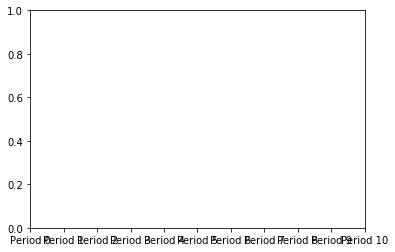

In [751]:

valeurs = period_relative_model
colours = ['b','g','r','c','m','y','k','w'] #to make sure colours remain the same throughout all slices


valeurs3 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(item)   
    valeurs3[key2] = list_temp



for key,vals in valeurs3.items():
    print(key,vals)
    print(type(key),type(vals))
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
  #          plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            for y in s_k_match[i]:
                try:
                    plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                except KeyError:
                    print("")
                except IndexError:
                    print("")
            
        else:         
            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            try:
                for y in s_k_match[i]:
                    try:
                        plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                    except KeyError:
                        print("")
                    except IndexError:
                        print("")
            except:
                print("")
                
        for value in k_s_match.values():
            if i == value: 
                print(i,colours[i])
        
plt.xticks(range(len(valeurs3)), valeurs3.keys())

#plt.figure(figsize=(20,10))

model_image = k_senses.name.split("/")[-1]

image = plt.gcf()
image.savefig(dir_out+"/"+model_image+".png")

plt.show()


In [752]:
print(s_k_match)

for key,vals in valeurs3.items():
    print(key,vals)
    #print(type(key),type(vals))
    for i in range(0,len(vals)):
        #print("model sense",i,"=",vals[i],"has the colour",colours[i])
        #print("this is the equivalent of")
        if k_s_match[i] != "NA":
            #print("expert sense",k_s_match[i],colours[int(k_s_match[i])],"\n")
            print(colours[i],"=====",colours[int(k_s_match[i])])
        else:
            print("NA\n")

{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
Period 0 [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06]
NA

NA

r ===== r
c ===== b
NA

y ===== c
k ===== g
w ===== g
NA

NA

NA

NA



IndexError: list index out of range

## TODO:
1. ~~Choose best (k,s) pair~~
1. Match k and s in the plots
2. Label the plots (senses, slices)
2. ~~Remove the "w" sense~~
3. Confidence interval (less important for now)
4. ~~Fix the recall calculation cfr email Valerio 28/03~~
5. ~~CHECK PROBABILITIES (conf)~~ 
6. Write output to file + sync github
7. ~~Fix length of time interval (100 vs 113)_~~ ||| earliest date [from parameter_file] vs time interval

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [753]:
print(period_relative,"\n")
print(period_relative_model)

{0: [0, 0, 0, 0], 1: [0, 0, 0, 0], 2: [0, 0, 0, 0], 3: [0.06451612903225806, 0.3548387096774194, 0.5806451612903226, 0.0], 4: [0.1111111111111111, 0.5555555555555556, 0.3333333333333333, 0.0], 5: [0.6666666666666666, 0.3333333333333333, 0.0, 0.0], 6: [0.25, 0.75, 0.0, 0.0], 7: [0.3076923076923077, 0.6153846153846154, 0.07692307692307693, 0.0], 8: [0.5384615384615384, 0.4230769230769231, 0.038461538461538464, 0.0], 9: [0.15789473684210525, 0.47368421052631576, 0.3157894736842105, 0.05263157894736842], 10: [0.13043478260869565, 0.5507246376811594, 0.014492753623188406, 0.30434782608695654]} 

{'0': [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06], '1': [4.264095794867512e-07, 1.1548742971726732e-11, 2.

## Correlation

In [754]:
period_relative_model # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print(len(period_relative))
print(len(period_relative_model)) 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]))

['mus-1', 'NA', 'mus-4', 'mus-2']
11
11
period 0 
S [0, 0, 0, 0] 
K [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06] 
 4 15
period 1 
S [0, 0, 0, 0] 
K [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.174958886960884e-06, 3.0618581542379034e-09] 
 4 15
period 2 
S [0, 0, 0, 0] 
K [3.753318488630808e-05, 2.4228506045686707e-09, 7.176899654721333e-16, 7.513111722667335e-14, 1.6527477250048993e-20, 1.7766669289231163e-09, 1.0201004963580681e-12, 6.86683810

In [755]:
print(expert_senses)
print(s_k_match)

['mus-1', 'NA', 'mus-4', 'mus-2']
{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}


In [756]:
k_s_match

{0: 'NA',
 1: 'NA',
 2: 2,
 3: 0,
 4: 'NA',
 5: 3,
 6: 1,
 7: 1,
 8: 'NA',
 9: 'NA',
 10: 'NA',
 11: 'NA',
 12: 1,
 13: 1,
 14: 'NA'}

In [757]:
correl_pairs = dict() # correl_pairs[s,k] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)

for key in s_k_match.keys():
    print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
            
        if key == "NA" :
            print("we have",len(s_k_match[NA_key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][NA_key])
            temp_list_s.append(period_relative[i][NA_key])
            temp_score_k = 0

            
            for k in s_k_match[NA_key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
            
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
            
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

del correl_pairs[NA_key]
print(correl_pairs)
    

NA sense is at index 1
looking at S NA with Ks [0, 1, 4, 8, 9, 10, 11, 14]
we have 4 Ks for S NA
period 0 freq 0
K: 6
période 0 prob 6.43658657001053e-19
K: 7
période 0 prob 0.9525629059652074
K: 12
période 0 prob 9.197607480466898e-08
K: 13
période 0 prob 1.1167229112201643e-10
K: 0
période 0 prob 2.9789427109083325e-10
K: 1
période 0 prob 2.21390793392335e-14
K: 4
période 0 prob 1.5510378328094246e-28
K: 8
période 0 prob 7.382978713713643e-11
K: 9
période 0 prob 3.353940670840392e-08
K: 10
période 0 prob 0.04742876767627993
K: 11
période 0 prob 6.54129966391537e-42
K: 14
période 0 prob 8.200357084901964e-06
total score for Ks 0.9999999999974722 

we have 4 Ks for S NA
period 1 freq 0
K: 6
période 1 prob 5.3775352718217675e-12
K: 7
période 1 prob 0.45778867182687244
K: 12
période 1 prob 2.4013434463952682e-08
K: 13
période 1 prob 1.174958886960884e-06
K: 0
période 1 prob 4.264095794867512e-07
K: 1
période 1 prob 1.1548742971726732e-11
K: 4
période 1 prob 5.809555402425848e-23
K: 8
pér

In [759]:
import scipy.stats

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq and prob",item)
    print("correlation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])

    print("\n")
    


S NA freq and prob [0, 0, 0, 0.3548387096774194, 0.5555555555555556, 0.3333333333333333, 0.75, 0.6153846153846154, 0.4230769230769231, 0.47368421052631576, 0.5507246376811594]
S NA freq and prob [0.9999999999974722, 0.999999999994337, 0.999999998223257, 0.9981591168646553, 0.9995900808762224, 0.9999999963347697, 0.9988398046055846, 0.6809938680510087, 0.7443460676749498, 0.9013812467465724, 0.7499041409105235]
correlation: -0.6972770512466951
p-value: 0.017079434424797875


S 2 freq and prob [0, 0, 0, 0.5806451612903226, 0.3333333333333333, 0.0, 0.0, 0.07692307692307693, 0.038461538461538464, 0.3157894736842105, 0.014492753623188406]
S 2 freq and prob [5.5742828521483e-15, 2.3133638510810804e-13, 7.176899654721333e-16, 4.201845458622313e-12, 8.092778092982152e-11, 1.0224143916227942e-11, 1.4620770658254612e-12, 5.928033483855598e-09, 1.3368502940748237e-07, 0.07639542977465583, 0.0009992472535096883]
correlation: 0.6006814312247232
p-value: 0.050671287901135134


S 0 freq and prob [0, 

In [712]:
print(correl_pairs)

{'NA': [[0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.9999999999974722, 0.999999999994337, 0.999999998223257, 0.9981591168646553, 0.9995900808762224, 0.9999999963347697, 0.9988398046055846, 0.6809938680510087, 0.7443460676749498, 0.9013812467465724, 0.7499041409105235]], 2: [[0, 0, 0, 0.9, 0.75, 0.0, 0.0, 0.2, 0.06666666666666667, 0.6, 0.03225806451612903], [5.5742828521483e-15, 2.3133638510810804e-13, 7.176899654721333e-16, 4.201845458622313e-12, 8.092778092982152e-11, 1.0224143916227942e-11, 1.4620770658254612e-12, 5.928033483855598e-09, 1.3368502940748237e-07, 0.07639542977465583, 0.0009992472535096883]], 0: [[0, 0, 0, 0.1, 0.25, 1.0, 1.0, 0.8, 0.9333333333333333, 0.3, 0.2903225806451613], [8.102423267484995e-18, 5.861131185278025e-13, 7.513111722667335e-14, 8.5736326059464e-08, 1.7061327555686848e-09, 1.7783117831757417e-09, 7.754449299400271e-09, 0.006587289137327789, 0.24481500741485787, 0.022222867724171685, 0.1510384808667229]], 3: [[0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.